### Importing Libraries

In [1]:
# Pre Processing 
import pandas as pd
import datetime as dt
import numpy as np

# Exploratory Data
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

### Load Telco Churn Dataset

In [2]:
Telco = pd.read_csv('Telcom.csv')
pd.set_option('display.max_columns', None)
Telco.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


### Dataset Profiling 

In [3]:
print("Dataset dimension :", Telco.ndim)
print("Dataset shape :", Telco.shape)
print("Dataset size :", Telco.size)

Dataset dimension : 2
Dataset shape : (7043, 21)
Dataset size : 147903


In [4]:
Telco_types = Telco.dtypes.reset_index()
Telco_types.columns = ['Features','Data Type']
Telco_types

,Features,Data Type
0,customerID,object
1,gender,object
2,SeniorCitizen,int64
3,Partner,object
4,Dependents,object
5,tenure,int64
6,PhoneService,object
7,MultipleLines,object
8,InternetService,object
9,OnlineSecurity,object


### Dataset Inspection

### Checking For Missing and Blank Values

In [5]:
missing_data = Telco.isnull().sum().reset_index()
missing_data.columns = ['Features','Missing Values']
blank_data = Telco.apply(lambda x : x == ' ').sum().reset_index()
blank_data.columns = ['Features','Blank Values']
merged_data = pd.merge(missing_data, blank_data, on=['Features'])
merged_data['Filling Factor'] = (Telco.shape[0]-missing_data['Missing Values'] + Telco.shape[0]-blank_data['Blank Values'])/Telco.shape[0]*50
merged_data.sort_values(by='Filling Factor',ascending=True)

,Features,Missing Values,Blank Values,Filling Factor
19,TotalCharges,0,11,99.921908
0,customerID,0,0,100.000000
18,MonthlyCharges,0,0,100.000000
17,PaymentMethod,0,0,100.000000
16,PaperlessBilling,0,0,100.000000
15,Contract,0,0,100.000000
14,StreamingMovies,0,0,100.000000
13,StreamingTV,0,0,100.000000
12,TechSupport,0,0,100.000000
11,DeviceProtection,0,0,100.000000


### Locating Blank Values Data

In [6]:
filt = (Telco['TotalCharges'] == ' ')
Telco.loc[filt]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- The data needs to be cleaned of missing value, proceed to data cleaning.
- The process can be done by simply filling the blank space in TotaCharges variable by 0.

### Cross Checking Missing Values with ASSERT Statement

In [7]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(Telco).all().all()

Interpretation
 - The above command does not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.
 - All the values are greater than or equal to zero excluding character values.

### Dataset Overview

In [8]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
        
initial_eda(Telco)

Dimensions : 7043 rows, 21 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                            customerID     object         7043          0
                                gender     object            2          0
                         SeniorCitizen      int64            2          0
                               Partner     object            2          0
                            Dependents     object            2          0
                                tenure      int64           73          0
                          PhoneService     object            2          0
                         MultipleLines     object            3          0
                       InternetService     object            3          0
                        OnlineSecurity     object            3          0
                          OnlineBackup     object            3          0
                      DeviceProtection     object     

### Categorical Features

In [9]:
categorical = [var for var in Telco.columns if Telco[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 18 categorical variables

The categorical variables are :

 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


### Categorical Features Distinc Value Distribution

In [10]:
for var in categorical: 
    
    print(Telco[var].value_counts())

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: in

### Data Cleaning

### TotalCharge Blank Values Handling

 - As shown above, TotalCharges is still in object / string. Have to change it to either integer or float before. From dataset preview, we know that some of the values of this feature are decimal, then float is the choice.
 - Replacing the blank spaces by 0.0, because we choose float as our type for TotalCharges.
 - Using replace() to change blank spaces (' ') to ('0.0'), and then locate the replaced datas.

In [11]:
Telco['TotalCharges'] = Telco['TotalCharges'].replace([' '],['0.0'])
Telco['TotalCharges'] = Telco['TotalCharges'].astype(float)
# Cross Checking its distinct value
TC_count = Telco['TotalCharges'].value_counts().reset_index()
TC_count.columns = ['TotalCharges','Total Count']
TC_count.sort_values(by='Total Count',ascending=False)

,TotalCharges,Total Count
0,0.00,11
1,20.20,11
2,19.75,9
3,20.05,8
4,19.90,8
...,...,...
2412,3886.45,1
2411,1224.05,1
2410,2310.20,1
2409,723.40,1


 - Confirming that the variable's type has been changed to float
 - Further look into SeniorCitizen as it has a value 0 but instead its variable type is object / string and not integer. 
 - Check to see how many unique values for SeniorCitizen.

### Senior Citizen Feature Handling

In [12]:
print('Distinctr value(s) of SenioCitizen : ', Telco['SeniorCitizen'].unique())
print(Telco['SeniorCitizen'].value_counts())

Distinctr value(s) of SenioCitizen :  [0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [13]:
Telco['SeniorCitizen'] = Telco['SeniorCitizen'].astype(object)
Telco['SeniorCitizen'] = Telco['SeniorCitizen'].replace([0,1],['No','Yes'])

# Cross Checking its distinct value
SC_count = Telco['SeniorCitizen'].value_counts().reset_index()
SC_count.columns = ['SeniorCitizen','Total Count']
SC_count.sort_values(by='Total Count',ascending=False)

,SeniorCitizen,Total Count
0,No,5901
1,Yes,1142


 - Both of the 0 and 1 have been replaced for SeniorCitizen.

### Exploratory Data

### Dataset Basic Statistic

In [14]:
Telco.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Numerical Feature Plot

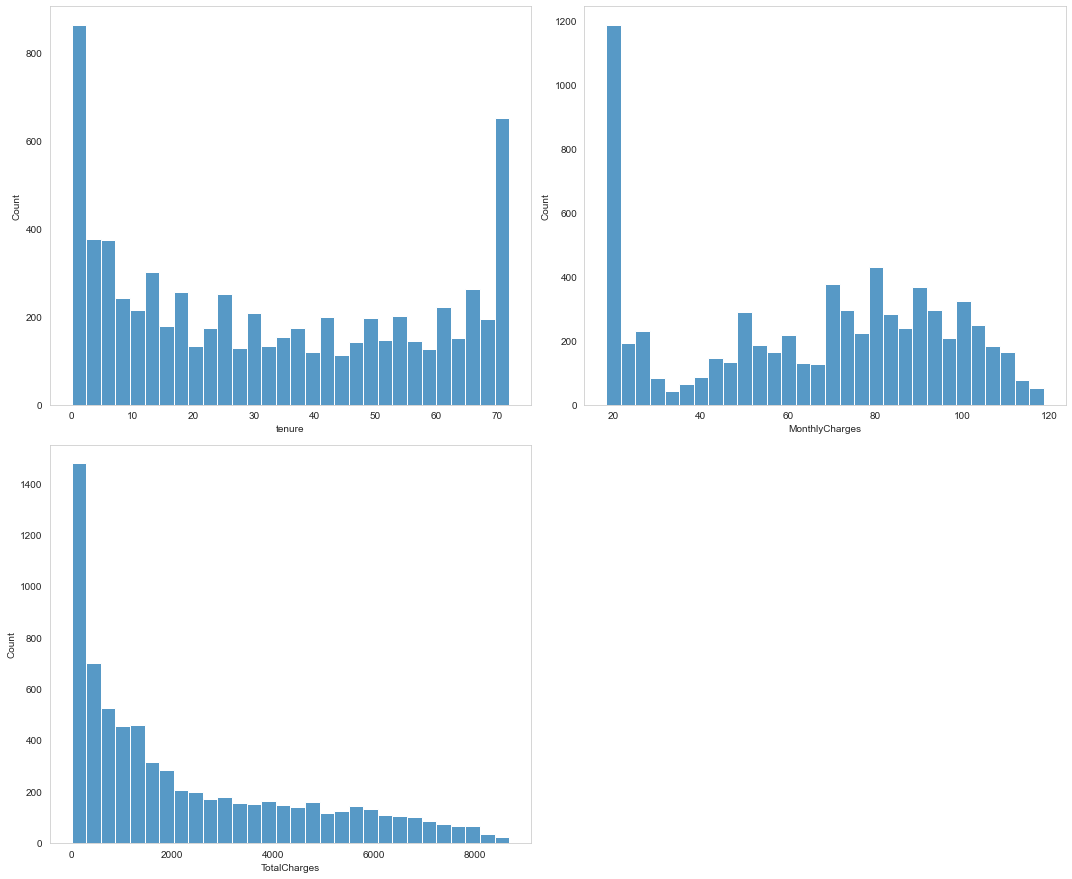

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

Telco_num = Telco[['tenure','MonthlyCharges','TotalCharges']]

plt.figure(figsize=(15, 18))
for i in range(0, len(list(Telco_num))):
    plt.subplot(3, 2, i+1)
    sns.histplot(x=Telco[list(Telco_num)[i]],bins = 30)
    plt.tight_layout()

### Outliers

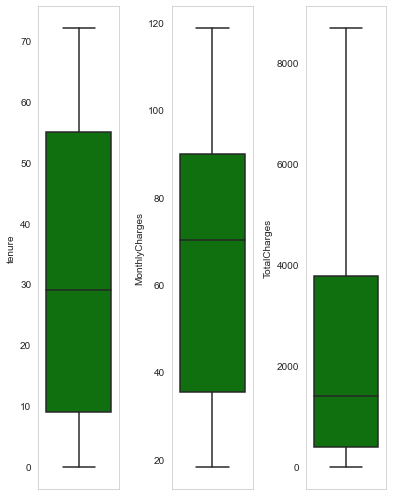

In [16]:
plt.figure(figsize=(13, 7))
for i in range(0, len(list(Telco_num))):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=Telco[list(Telco_num)[i]],color='green',orient='v')
    plt.tight_layout()

### Correlation

In [17]:
# plot correlation heatmap to find out correlations

Telco.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('viridis'), axis=1)

,tenure,MonthlyCharges,TotalCharges
tenure,1.0,0.2479,0.8262
MonthlyCharges,0.2479,1.0,0.6512
TotalCharges,0.8262,0.6512,1.0


### Categorical Plotting In Respect to Target Feature (Churn)

### Frequency Distribution of Churn per SeniorCitizen and Dependents

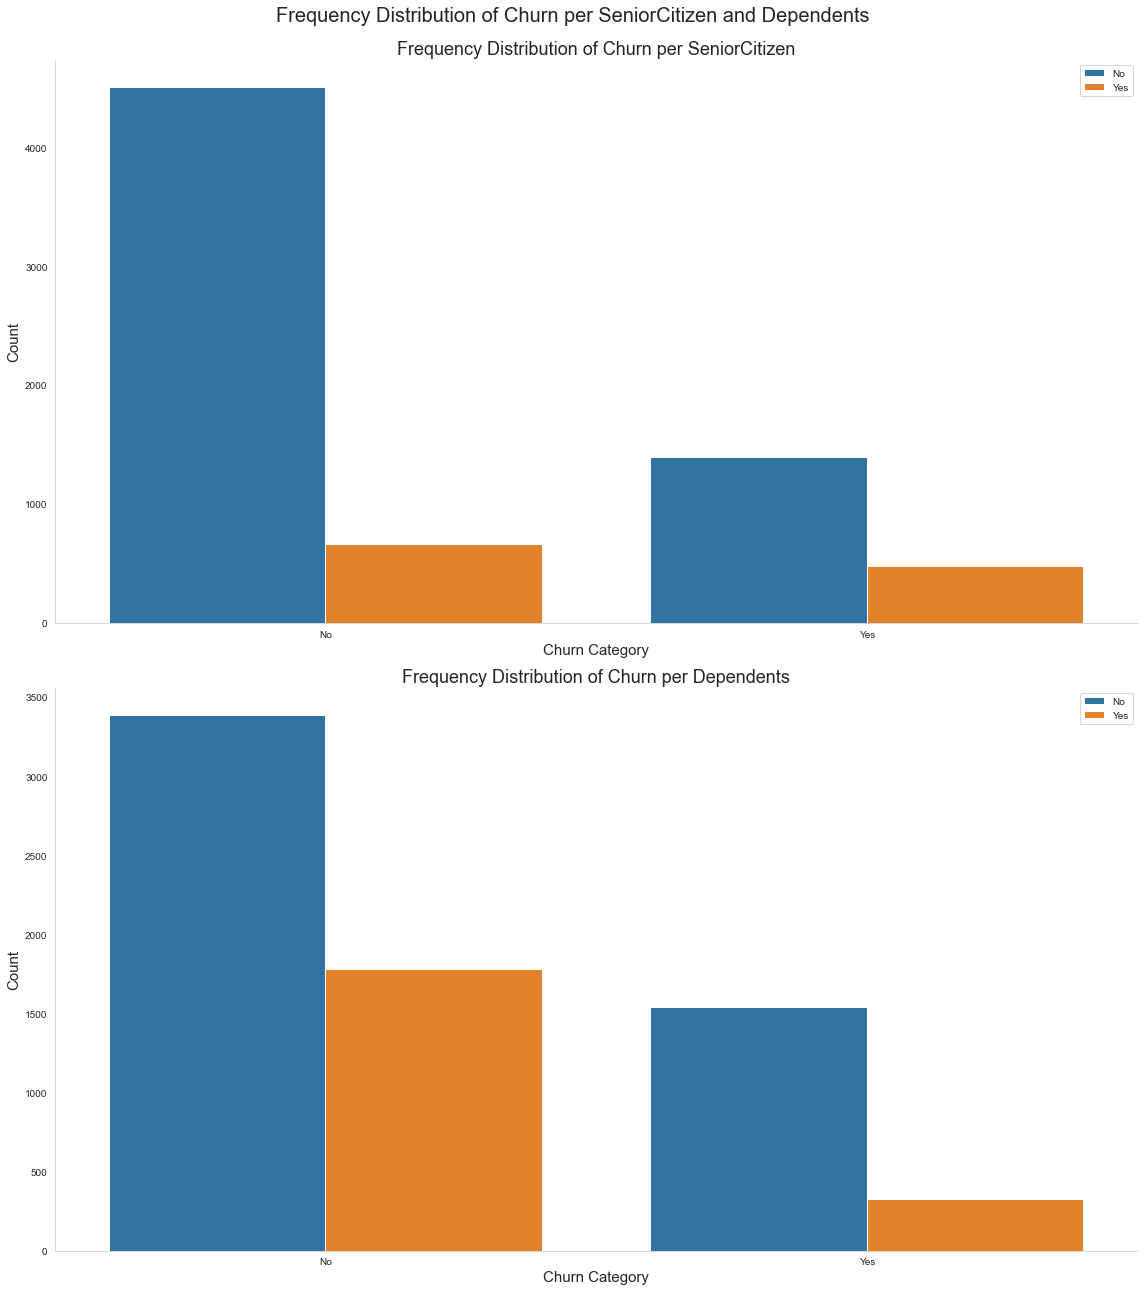

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Churn per SeniorCitizen and Dependents", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax1 = sns.countplot(x='Churn', hue='SeniorCitizen',ax=ax1, data=Telco)
ax1.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax1.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Frequency Distribution of Churn per SeniorCitizen',fontsize=18, fontweight='normal')
ax1.legend(loc='upper right')


#Plot 2
ax2 = sns.countplot(x='Churn', hue='Dependents',ax=ax2, data=Telco)
ax2.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax2.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Frequency Distribution of Churn per Dependents',fontsize=18, fontweight='normal')
ax2.legend(loc='upper right')

plt.tight_layout()

### Frequency Distribution of Churn per PhoneService and InternetService

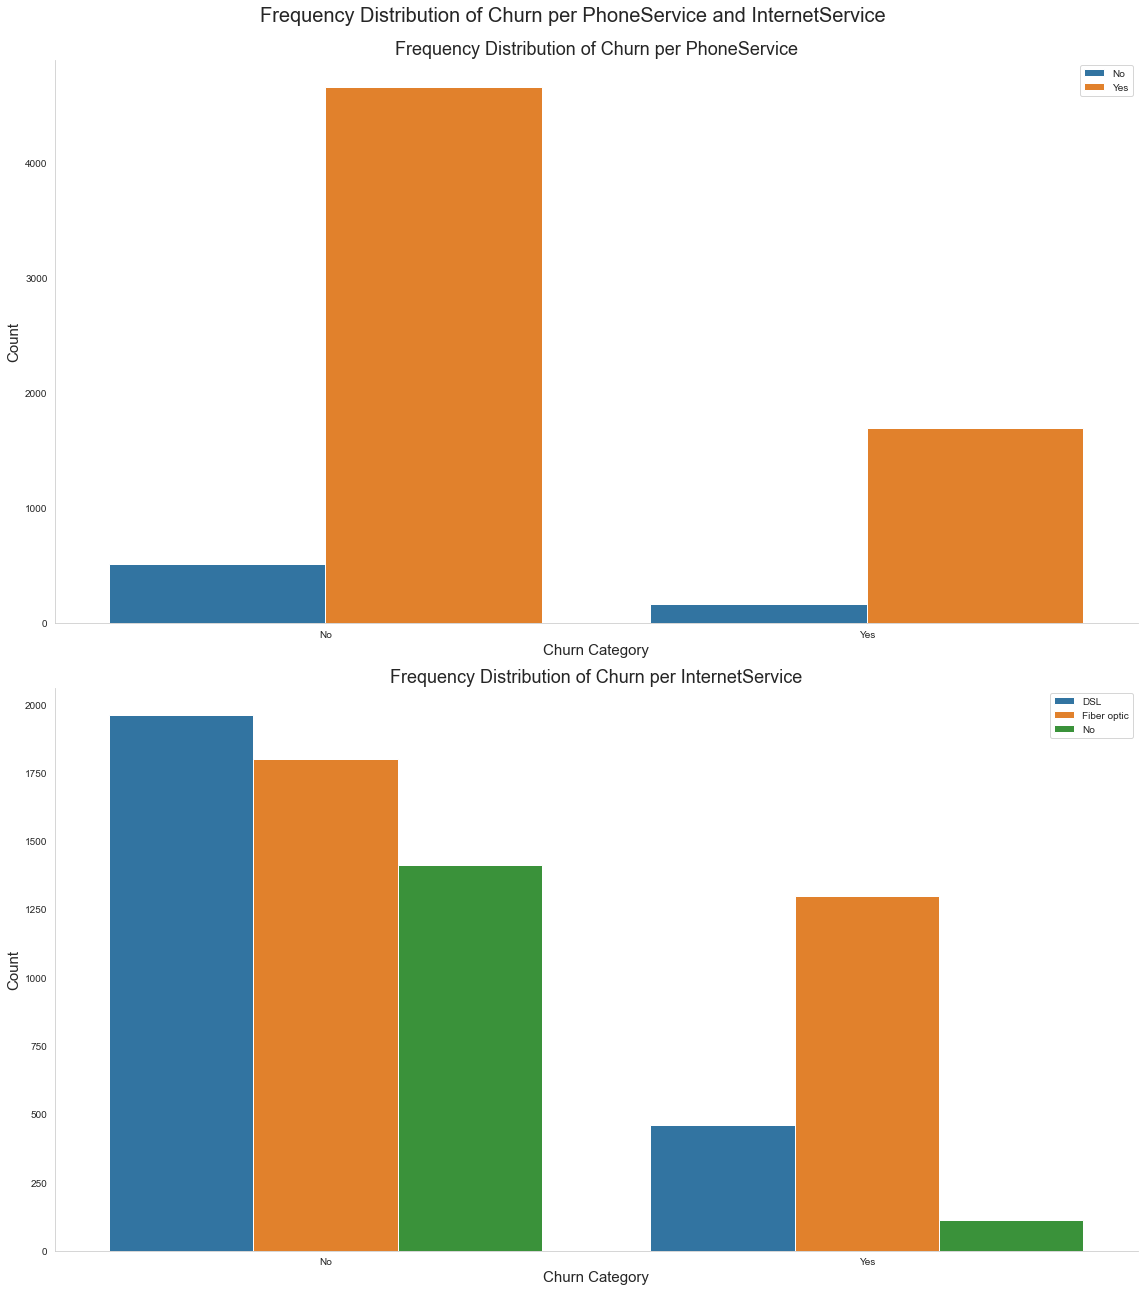

In [19]:
fig, (ax3, ax4) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Churn per PhoneService and InternetService", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax3 = sns.countplot(x='Churn', hue='PhoneService',ax=ax3, data=Telco)
ax3.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax3.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('Frequency Distribution of Churn per PhoneService',fontsize=18, fontweight='normal')
ax3.legend(loc='upper right')


#Plot 2
ax4 = sns.countplot(x='Churn', hue='InternetService',ax=ax4, data=Telco)
ax4.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax4.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Frequency Distribution of Churn per InternetService',fontsize=18, fontweight='normal')
ax4.legend(loc='upper right')

plt.tight_layout()

### Frequency Distribution of Churn per MultipleLines

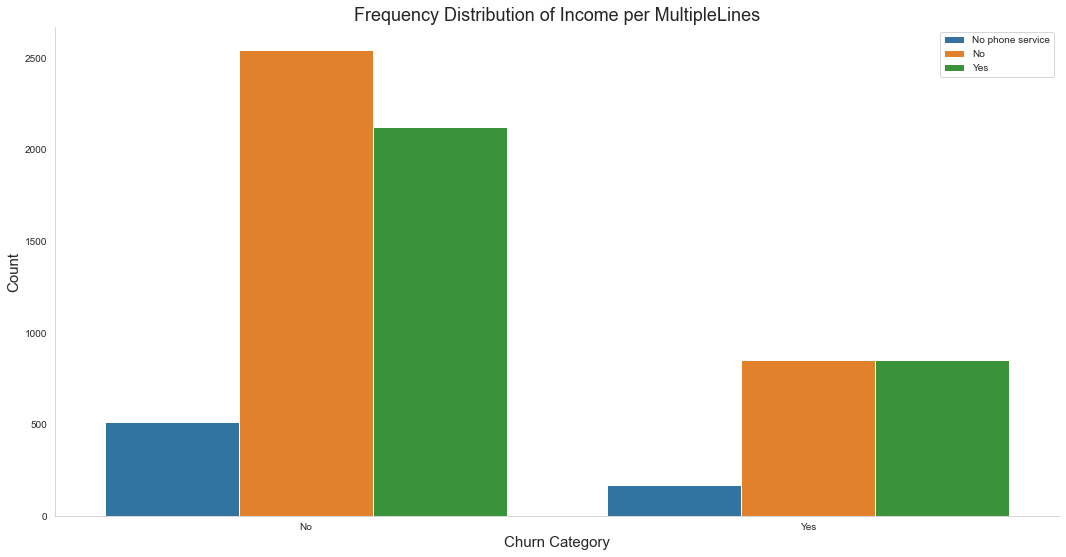

In [20]:
fig5=plt.figure(figsize=(18,9))
ax5 = sns.countplot(x='Churn', hue='MultipleLines', data=Telco)
ax5.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax5.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.set_title('Frequency Distribution of Income per MultipleLines',fontsize=18, fontweight='normal')
ax5.legend(loc='upper right')

### Frequency Distribution of Churn per OnlineSecurity and OnlineBackup

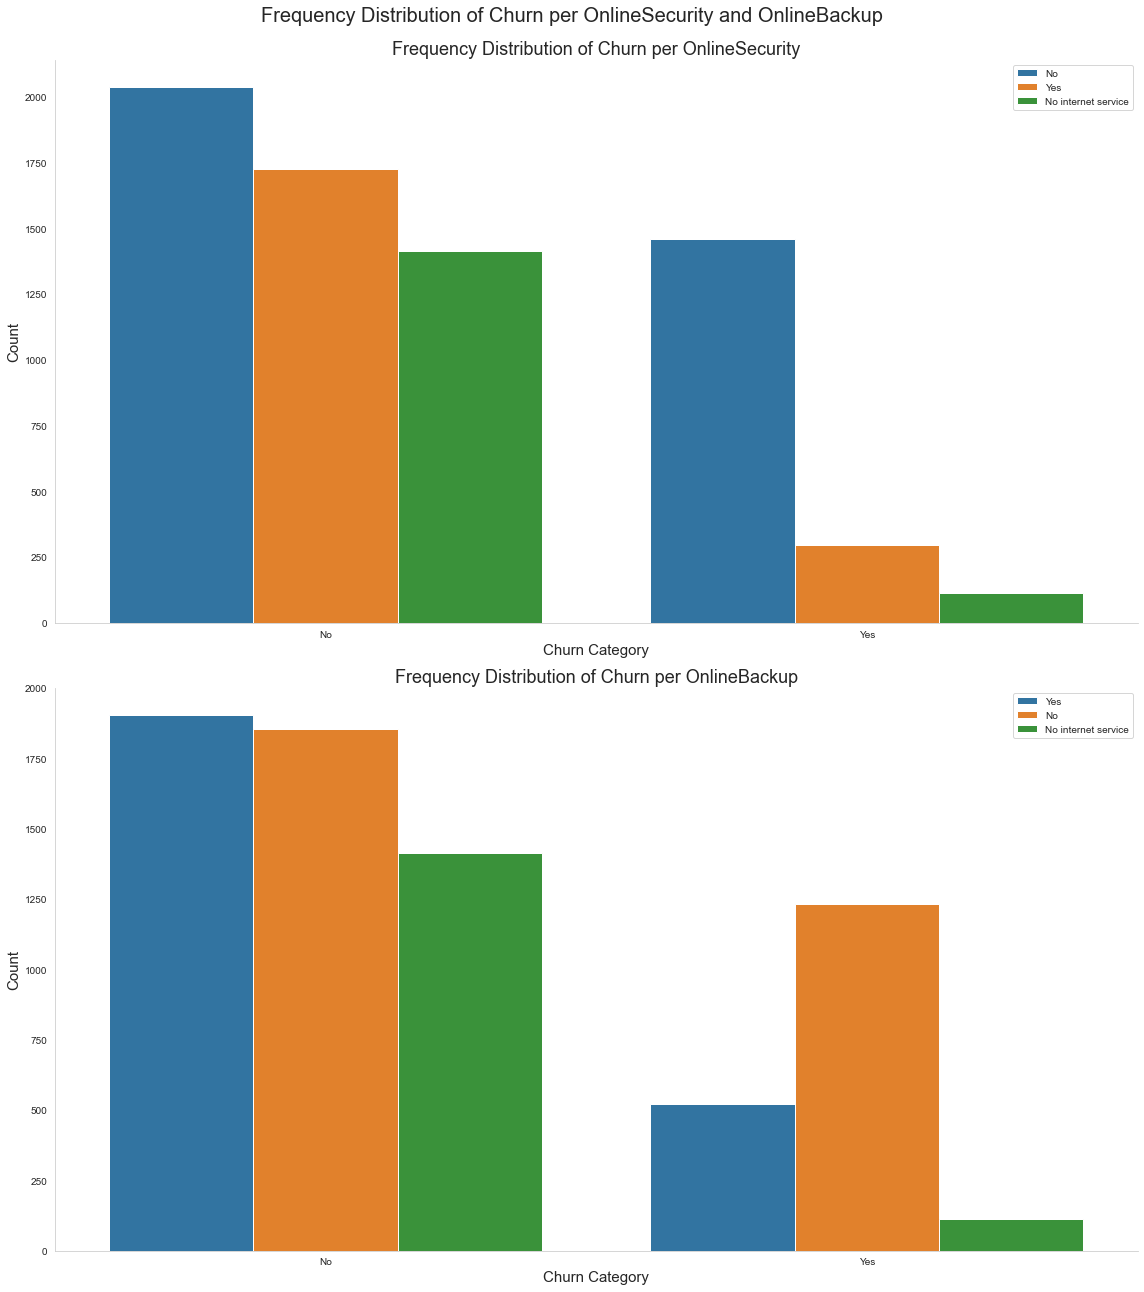

In [21]:
fig, (ax6, ax7) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Churn per OnlineSecurity and OnlineBackup", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax6 = sns.countplot(x='Churn', hue='OnlineSecurity',ax=ax6, data=Telco)
ax6.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax6.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_title('Frequency Distribution of Churn per OnlineSecurity',fontsize=18, fontweight='normal')
ax6.legend(loc='upper right')


#Plot 2
ax7 = sns.countplot(x='Churn', hue='OnlineBackup',ax=ax7, data=Telco)
ax7.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax7.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.set_title('Frequency Distribution of Churn per OnlineBackup',fontsize=18, fontweight='normal')
ax7.legend(loc='upper right')

plt.tight_layout()

### Frequency Distribution of Churn per DeviceProtection and TechSupport

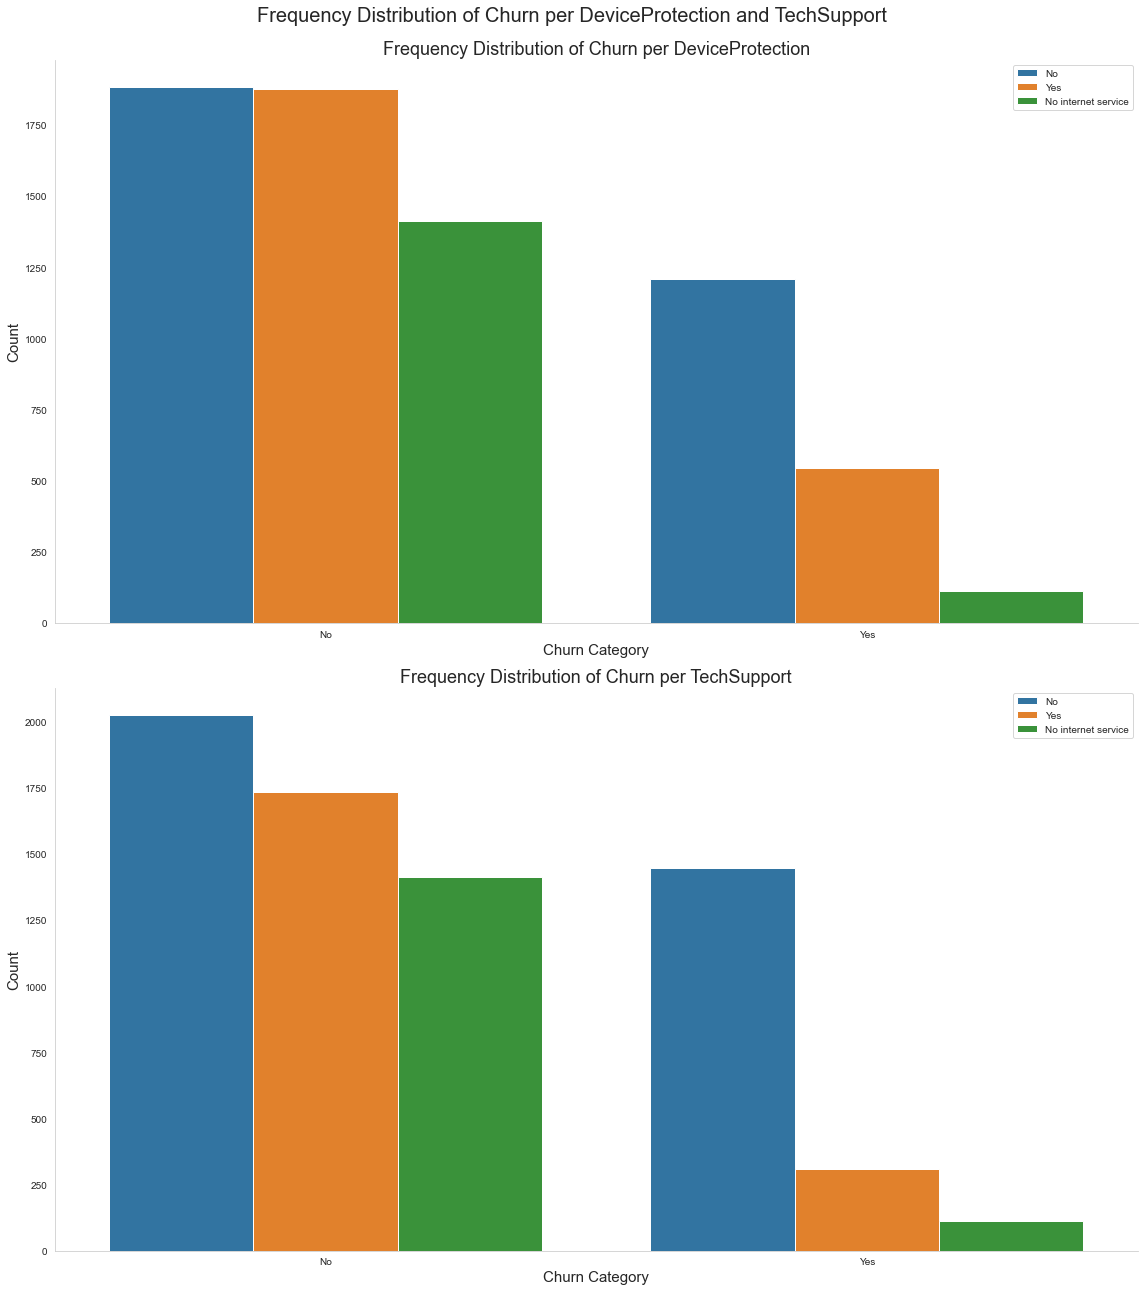

In [22]:
fig, (ax8, ax9) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Churn per DeviceProtection and TechSupport", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax8 = sns.countplot(x='Churn', hue='DeviceProtection',ax=ax8, data=Telco)
ax8.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax8.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.set_title('Frequency Distribution of Churn per DeviceProtection',fontsize=18, fontweight='normal')
ax8.legend(loc='upper right')


#Plot 2
ax9 = sns.countplot(x='Churn', hue='TechSupport',ax=ax9, data=Telco)
ax9.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax9.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.set_title('Frequency Distribution of Churn per TechSupport',fontsize=18, fontweight='normal')
ax9.legend(loc='upper right')

plt.tight_layout()

### Frequency Distribution of Churn per StreamingTV and StreamingMovies

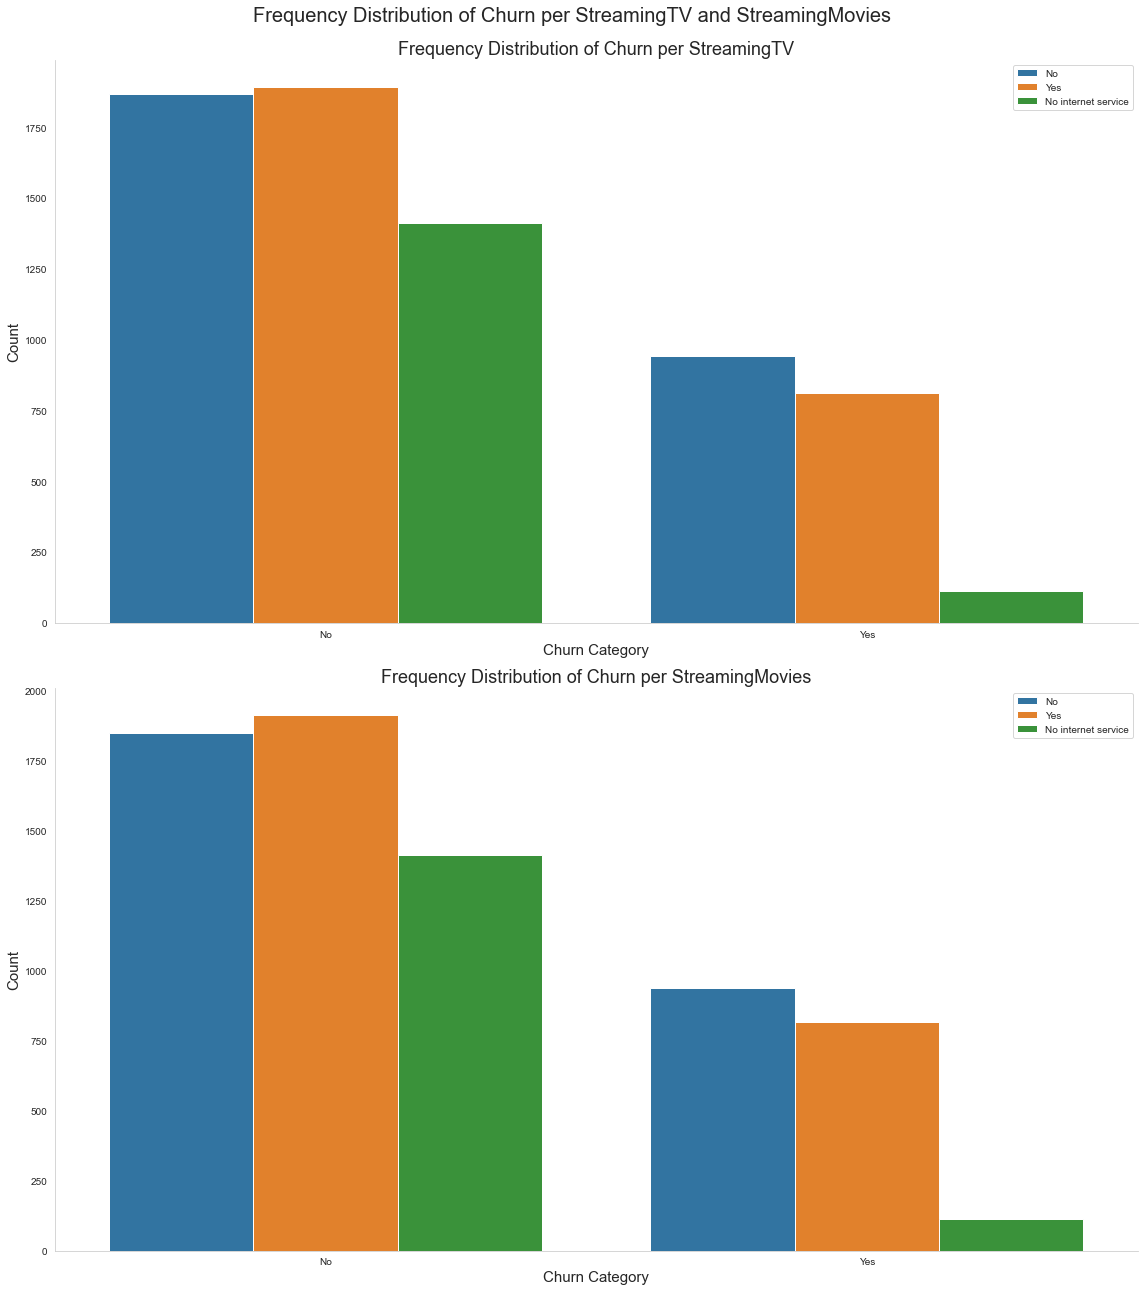

In [23]:
fig, (ax10, ax11) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Churn per StreamingTV and StreamingMovies", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax10 = sns.countplot(x='Churn', hue='StreamingTV',ax=ax10, data=Telco)
ax10.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax10.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.set_title('Frequency Distribution of Churn per StreamingTV',fontsize=18, fontweight='normal')
ax10.legend(loc='upper right')


#Plot 2
ax11 = sns.countplot(x='Churn', hue='StreamingMovies',ax=ax11, data=Telco)
ax11.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax11.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.set_title('Frequency Distribution of Churn per StreamingMovies',fontsize=18, fontweight='normal')
ax11.legend(loc='upper right')

plt.tight_layout()

### Frequency Distribution of Churn per Contract

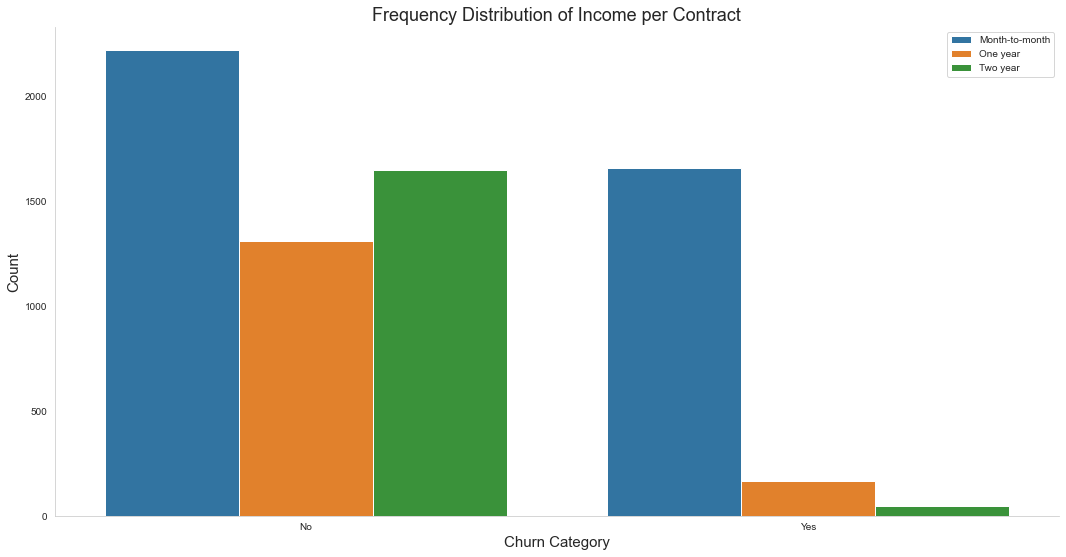

In [24]:
fig12=plt.figure(figsize=(18,9))
ax12 = sns.countplot(x='Churn', hue='Contract', data=Telco)
ax12.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax12.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.set_title('Frequency Distribution of Income per Contract',fontsize=18, fontweight='normal')
ax12.legend(loc='upper right')

### Frequency Distribution of Churn per PaymentMethod and PaperlessBilling

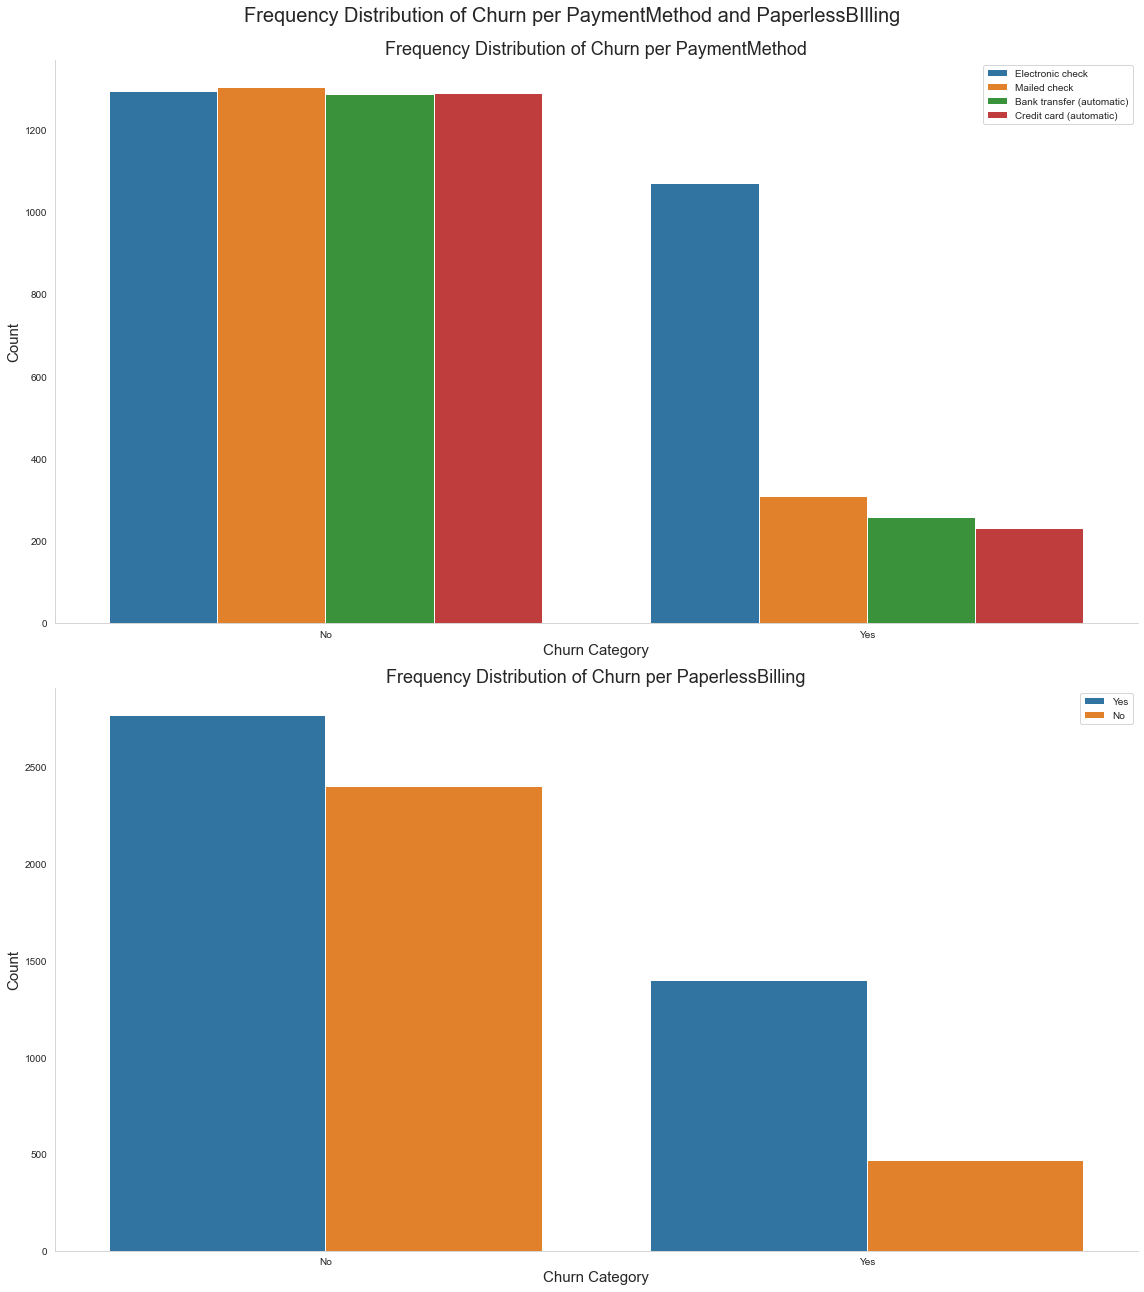

In [25]:
fig, (ax13, ax14) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Churn per PaymentMethod and PaperlessBIlling", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax13 = sns.countplot(x='Churn', hue='PaymentMethod',ax=ax13, data=Telco)
ax13.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax13.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax13.spines['right'].set_visible(False)
ax13.spines['top'].set_visible(False)
ax13.set_title('Frequency Distribution of Churn per PaymentMethod',fontsize=18, fontweight='normal')
ax13.legend(loc='upper right')


#Plot 2
ax14 = sns.countplot(x='Churn', hue='PaperlessBilling',ax=ax14, data=Telco)
ax14.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax14.set_xlabel('Churn Category',fontsize=15,fontweight='normal') 
ax14.spines['right'].set_visible(False)
ax14.spines['top'].set_visible(False)
ax14.set_title('Frequency Distribution of Churn per PaperlessBilling',fontsize=18, fontweight='normal')
ax14.legend(loc='upper right')

plt.tight_layout()

### Prepare Data For Machine Learning 

### Imbalance Target Data Checking

In [26]:
print('Distinct value(s) of Churn : ', Telco['Churn'].unique())
print(Telco['Churn'].value_counts()/float(len(Telco)))

Distinct value(s) of Churn :  ['No' 'Yes']
No     0.73463
Yes    0.26537
Name: Churn, dtype: float64


 - It is rather an imbalanced data.
 - Accuracy will not be the best tool to measure performance of the model. Precision, Recall and F1 Score are preferable.

In [27]:
Telco['Churn'] = Telco['Churn'].replace(['No','Yes'],[0,1])
Telco['Churn'] = Telco['Churn'].astype(np.int64)

print('Distinc value(s) of Churn : ', Telco['Churn'].unique())
print(Telco['Churn'].value_counts())

Distinc value(s) of Churn :  [0 1]
0    5174
1    1869
Name: Churn, dtype: int64


### Splitting Dataset To Train and Test Set

In [28]:
# Target Feature
X = Telco.drop(['Churn','customerID'], axis=1)
Y = Telco['Churn']

# Split Dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Splitting to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

### Train and Test Set Profiling

In [29]:
print("Train set dimension :", X_train.ndim)
print("Train set shape :", X_train.shape)
print("Train set size :", X_train.size)

Train set dimension : 2
Train set shape : (5282, 19)
Train set size : 100358


In [30]:
print("Test set dimension :", X_test.ndim)
print("Test set shape :", X_test.shape)
print("Test set size :", X_test.size)

Test set dimension : 2
Test set shape : (1761, 19)
Test set size : 33459


### Defining Numerical and Categorical Features

In [31]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [32]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

### Data Pre Processing : Custom Pipeline Transformation

### Categorical Encoders

In [33]:
# import category encoders
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder


# Encode categorical variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod'])
X_train = encoder.fit_transform(X_train)
X_train

,gender_1,gender_2,SeniorCitizen_1,SeniorCitizen_2,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges
5368,1,0,1,0,1,0,1,0,3,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,70.30,235.50
6823,1,0,0,1,1,0,1,0,4,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,50.55,235.65
4861,1,0,1,0,0,1,1,0,48,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,58.95,2789.70
4132,1,0,0,1,1,0,1,0,13,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,23.90,300.80
5832,0,1,0,1,0,1,0,1,20,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,70.45,1470.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,0,1,0,1,0,1,0,1,13,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,61.80,750.10
6253,1,0,0,1,1,0,1,0,56,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,44.85,2564.95
1931,1,0,0,1,0,1,1,0,53,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,111.80,5809.75
5600,0,1,0,1,0,1,0,1,7,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,69.95,529.50


In [34]:
# For Test Set
X_test = encoder.transform(X_test)
X_test

,gender_1,gender_2,SeniorCitizen_1,SeniorCitizen_2,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges
5585,0,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,19.30,19.30
3317,0,1,0,1,0,1,1,0,63,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,70.80,4448.80
6875,1,0,0,1,0,1,1,0,64,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,19.45,1208.60
6074,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,23.45,23.45
1758,1,0,0,1,1,0,1,0,68,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,20.05,1386.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,0,1,0,1,0,1,1,0,41,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,19.75,899.45
2058,0,1,0,1,1,0,1,0,72,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,86.65,6224.80
3206,1,0,0,1,1,0,1,0,6,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,20.00,109.20
5977,0,1,0,1,1,0,1,0,57,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,20.65,1125.60


### Feature Scaling

In [35]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,gender_1,gender_2,SeniorCitizen_1,SeniorCitizen_2,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-0.565217,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.002745,-0.341449
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.543478,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.358728,-0.341405
2,0.0,0.0,1.0,-1.0,-1.0,1.0,0.0,0.0,0.413043,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.204987,0.414886
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.347826,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.846488,-0.322113
4,-1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,-0.195652,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.005491,0.024385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,-0.347826,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0,0.0,0.0,-0.152825,-0.189069
5278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.586957,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.463052,0.348334
5279,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.521739,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.762297,1.309165
5280,-1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,1.0,-0.478261,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.003660,-0.254392


In [36]:
# For Test Set
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])
X_test

,gender_1,gender_2,SeniorCitizen_1,SeniorCitizen_2,Partner_1,Partner_2,Dependents_1,Dependents_2,tenure,PhoneService_1,PhoneService_2,MultipleLines_1,MultipleLines_2,MultipleLines_3,InternetService_1,InternetService_2,InternetService_3,OnlineSecurity_1,OnlineSecurity_2,OnlineSecurity_3,OnlineBackup_1,OnlineBackup_2,OnlineBackup_3,DeviceProtection_1,DeviceProtection_2,DeviceProtection_3,TechSupport_1,TechSupport_2,TechSupport_3,StreamingTV_1,StreamingTV_2,StreamingTV_3,StreamingMovies_1,StreamingMovies_2,StreamingMovies_3,Contract_1,Contract_2,Contract_3,PaperlessBilling_1,PaperlessBilling_2,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,PaymentMethod_4,MonthlyCharges,TotalCharges
0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.608696,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.930679,-0.405469
1,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.739130,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,1.0,0.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.011897,0.906169
2,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.760870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,0.0,1.0,0.0,-0.927934,-0.053301
3,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,-0.608696,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.854724,-0.404240
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.847826,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,1.0,0.0,0.0,-0.916953,-0.000503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,-1.0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.260870,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.922443,-0.144844
1757,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.934783,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,1.0,0.0,1.0,0.0,0.0,0.301990,1.432068
1758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,1.0,-0.917868,-0.378849
1759,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608696,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,-1.0,1.0,0.0,1.0,0.0,0.0,-0.905971,-0.077878


### Machine Learning Model Implementation

In [37]:
X_train.columns = X_train.columns.get_level_values(0)
X_test.columns = X_test.columns.get_level_values(0)

### Random Forest 

In [38]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score

# Choosing Model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=50)
forest_clf.fit(X_train, y_train)
predictions = forest_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = forest_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.9979174555092768
Train Precision 0.9971509971509972
Train Recall 0.9950248756218906
Train F1 Score 0.9960868018498755
****************************************
******************Test*******************
Test Accuracy 0.7881885292447472
Test Precision 0.6219178082191781
Test Recall 0.49134199134199136
Test F1 Score 0.5489721886336155
*****************************************


### Random Forest (100 Estimators)

In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score

# Choosing Model
from sklearn.ensemble import RandomForestClassifier
forest_clf100 = RandomForestClassifier(random_state=50,n_estimators=100)
forest_clf100.fit(X_train, y_train)
predictions = forest_clf100.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = forest_clf100.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.9979174555092768
Train Precision 0.9971509971509972
Train Recall 0.9950248756218906
Train F1 Score 0.9960868018498755
****************************************
******************Test*******************
Test Accuracy 0.7881885292447472
Test Precision 0.6219178082191781
Test Recall 0.49134199134199136
Test F1 Score 0.5489721886336155
*****************************************


### SGB Model

In [40]:
# Choosing Model
from sklearn.ensemble import GradientBoostingClassifier
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = SGB_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.8330177962892844
Train Precision 0.7312775330396476
Train Recall 0.589907604832978
Train F1 Score 0.6530291109362707
****************************************
******************Test*******************
Test Accuracy 0.8012492901760363
Test Precision 0.6414141414141414
Test Recall 0.5497835497835498
Test F1 Score 0.592074592074592
*****************************************


### LightGBM Model

In [ ]:
pip install lightgbm

In [41]:
# Choosing Model
import lightgbm as lgb
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = LGBM_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.8835668307459296
Train Precision 0.8245901639344262
Train Recall 0.7149964463397299
Train F1 Score 0.7658926532165969
****************************************
******************Test*******************
Test Accuracy 0.7950028392958546
Test Precision 0.6265664160401002
Test Recall 0.5411255411255411
Test F1 Score 0.5807200929152148
*****************************************


### Find Importance Features with Random Forest Model

In [42]:
# view the feature scores using 100 estimators
forest_clf100 = RandomForestClassifier(random_state=50,n_estimators=100)
forest_clf100.fit(X_train, y_train)
predictions = forest_clf100.predict(X_train)

feature_scores = pd.Series(forest_clf100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores.to_string())

TotalCharges          0.161117
tenure                0.136648
MonthlyCharges        0.136246
Contract_1            0.048898
OnlineSecurity_1      0.039529
PaymentMethod_1       0.025992
TechSupport_1         0.022289
InternetService_1     0.021912
Contract_3            0.018588
gender_1              0.017916
gender_2              0.017490
DeviceProtection_1    0.016477
PaperlessBilling_1    0.016043
PaperlessBilling_2    0.015969
OnlineBackup_1        0.014744
Partner_1             0.014675
Partner_2             0.013923
TechSupport_3         0.013750
SeniorCitizen_2       0.013251
PaymentMethod_3       0.013179
MultipleLines_1       0.013095
MultipleLines_3       0.013024
SeniorCitizen_1       0.012967
PaymentMethod_2       0.012519
OnlineBackup_2        0.012500
Dependents_1          0.012409
PaymentMethod_4       0.012197
Dependents_2          0.012140
InternetService_2     0.011951
StreamingMovies_2     0.011738
StreamingMovies_1     0.011468
DeviceProtection_3    0.011405
Streamin

### Find Importance Features with SGB Model

In [43]:
# view the feature scores using 100 estimators
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

feature_scores2 = pd.Series(SGB_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores2.to_string())

Contract_1            0.376698
tenure                0.166692
TotalCharges          0.083088
MonthlyCharges        0.077611
InternetService_1     0.076950
OnlineSecurity_1      0.069045
TechSupport_1         0.037647
PaymentMethod_1       0.034399
PaperlessBilling_2    0.012180
MultipleLines_1       0.009746
StreamingMovies_2     0.008222
Contract_3            0.008060
PaperlessBilling_1    0.007989
StreamingTV_3         0.006405
SeniorCitizen_1       0.003291
Contract_2            0.003108
SeniorCitizen_2       0.002852
OnlineBackup_1        0.002302
DeviceProtection_1    0.002116
Partner_1             0.001989
Dependents_1          0.001467
StreamingTV_1         0.001283
gender_2              0.001080
PaymentMethod_4       0.000805
Dependents_2          0.000740
Partner_2             0.000669
OnlineBackup_2        0.000664
PaymentMethod_3       0.000529
StreamingMovies_3     0.000488
PhoneService_2        0.000468
TechSupport_3         0.000335
gender_1              0.000325
Multiple

### Find Importance Features with LightGBM Model

In [44]:
# view the feature scores using 100 estimators
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

feature_scores3 = pd.Series(LGBM_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores3.to_string())

MonthlyCharges        839
TotalCharges          681
tenure                422
gender_1               93
PaperlessBilling_1     84
PaymentMethod_1        68
TechSupport_1          53
OnlineSecurity_1       52
Partner_1              50
OnlineBackup_1         47
MultipleLines_1        46
SeniorCitizen_1        44
Contract_1             44
Contract_2             43
DeviceProtection_1     39
Dependents_1           38
PaymentMethod_2        35
StreamingMovies_1      31
Contract_3             26
PaymentMethod_3        23
StreamingTV_1          23
PaymentMethod_4        22
StreamingTV_3          22
InternetService_1      20
StreamingMovies_2      18
SeniorCitizen_2        17
TechSupport_3          15
DeviceProtection_3     15
OnlineBackup_2         15
PaperlessBilling_2     14
Partner_2              12
PhoneService_1         11
OnlineSecurity_2       10
MultipleLines_3         9
Dependents_2            8
gender_2                8
InternetService_2       3
PhoneService_2          0
StreamingMov

### Explain and Interpert Model Using Shapley

In [ ]:
pip install shap

### Random Forest Model

In [ ]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer1 = shap.TreeExplainer(forest_clf100)
shap_values1 = explainer1.shap_values(X_train)

# visualize the first prediction's explanation 
##shap.initjs()
##shap.force_plot(explainer1.expected_value, shap_values1[0,:], X_train.iloc[0,:])

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer1.expected_value, shap_values1, X_train)

In [ ]:
# View Shap Feature Importances
shap_values1 = shap.TreeExplainer(forest_clf100).shap_values(X_train)
shap.summary_plot(shap_values1, X_train, plot_type="bar")

In [ ]:
# Shap Summary Plot
shap.summary_plot(shap_values1, X_train)

### SGB Model

In [ ]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer2 = shap.TreeExplainer(SGB_clf)
shap_values2 = explainer2.shap_values(X_train)

# visualize the first prediction's explanation 
#shap.initjs()
#shap.force_plot(explainer2.expected_value, shap_values2[0,:], X_train.iloc[0,:])

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer2.expected_value, shap_values2, X_train)

In [ ]:
# View Shap Feature Importances
shap_values2 = shap.TreeExplainer(SGB_clf).shap_values(X_train)
shap.summary_plot(shap_values2, X_train, plot_type="bar")

In [ ]:
# Shap Summary Plot
shap.summary_plot(shap_values2, X_train)

### LightGBM Model

In [ ]:
# import shap library
import shap

# explain the model's predictions using SHAP
explainer3 = shap.TreeExplainer(LGBM_clf)
shap_values3 = explainer3.shap_values(X_train)

# visualize the first prediction's explanation 
#shap.initjs()
#shap.force_plot(explainer3.expected_value, shap_values3[0,:], X_train.iloc[0,:])

In [ ]:
# visualize the training set predictions
#shap.force_plot(explainer3.expected_value, shap_values3, X_train)

In [ ]:
# View Shap Feature Importances
shap_values3 = shap.TreeExplainer(LGBM_clf).shap_values(X_train)
shap.summary_plot(shap_values3, X_train, plot_type="bar")

In [ ]:
# Shap Summary Plot
shap.summary_plot(shap_values3, X_train)

### Visualize Feature Importance Using Yellowbrick

In [ ]:
# Import model and visualizer
from yellowbrick.model_selection import FeatureImportances

# Instantiate model and visualizer
SGB_clf = GradientBoostingClassifier()
visualizer = FeatureImportances(SGB_clf)
SGB_clf = GradientBoostingClassifier()

# Fit and display visualizer
visualizer.fit(X_train, y_train)
visualizer.show();

### Build New SGB Model Based on Selected Features

In [45]:
# Drop the least important feature from X_train and X_test

X_train = X_train.drop(['PaymentMethod_2','PhoneService_1','OnlineSecurity_3','MultipleLines_2','StreamingTV_2',
                       'TechSupport_2','InternetService_3','DeviceProtection_3','DeviceProtection_2','OnlineBackup_3',
                       'StreamingMovies_1'], axis=1)

X_test = X_test.drop(['PaymentMethod_2','PhoneService_1','OnlineSecurity_3','MultipleLines_2','StreamingTV_2',
                       'TechSupport_2','InternetService_3','DeviceProtection_3','DeviceProtection_2','OnlineBackup_3',
                       'StreamingMovies_1'], axis=1)


In [46]:
# Choosing Model
from sklearn.ensemble import GradientBoostingClassifier
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = SGB_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

*****************Train*******************
Train Accuracy 0.8330177962892844
Train Precision 0.7312775330396476
Train Recall 0.589907604832978
Train F1 Score 0.6530291109362707
****************************************
******************Test*******************
Test Accuracy 0.8012492901760363
Test Precision 0.6414141414141414
Test Recall 0.5497835497835498
Test F1 Score 0.592074592074592
*****************************************


### Confusion Matrix

<AxesSubplot:>

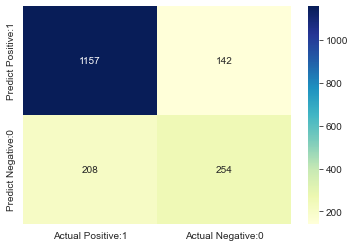

In [47]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, final_predictions)

# Visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification Reports

In [48]:
from sklearn.metrics import classification_report

print('************** Classification Reports ****************')
print(classification_report(y_test, final_predictions))
print('******************************************************')

************** Classification Reports ****************
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1299
           1       0.64      0.55      0.59       462

    accuracy                           0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.79      0.80      0.80      1761

******************************************************
